# Lab 6 - Reinforcement Learning

In [1]:
from wsilib.algorithms.rl.rl import Agent, HolePenaltyRewards, Rewards

## Trenowanie agenta

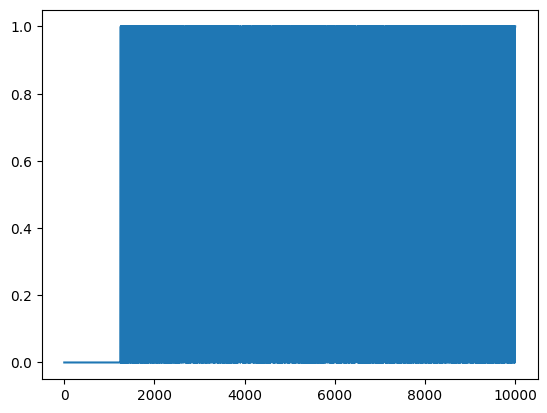

In [2]:
import gymnasium as gym

n = 8
is_slippery = False
map_name = f"{8}x{8}"
train_env = gym.make("FrozenLake-v1", map_name=map_name, is_slippery=is_slippery)

agent = Agent(
    train_env,
    n_episodes=10000,
    learning_rate=0.1,
    epsilon=1,
    epsilon_decay=0.1,
    discount_factor=0.99,
    rewards=HolePenaltyRewards,
)
agent.train().plot()


## Testowanie agenta

In [3]:
print(agent.test(1000))

0.87


## Wyniki dla różnych systemów nagród

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

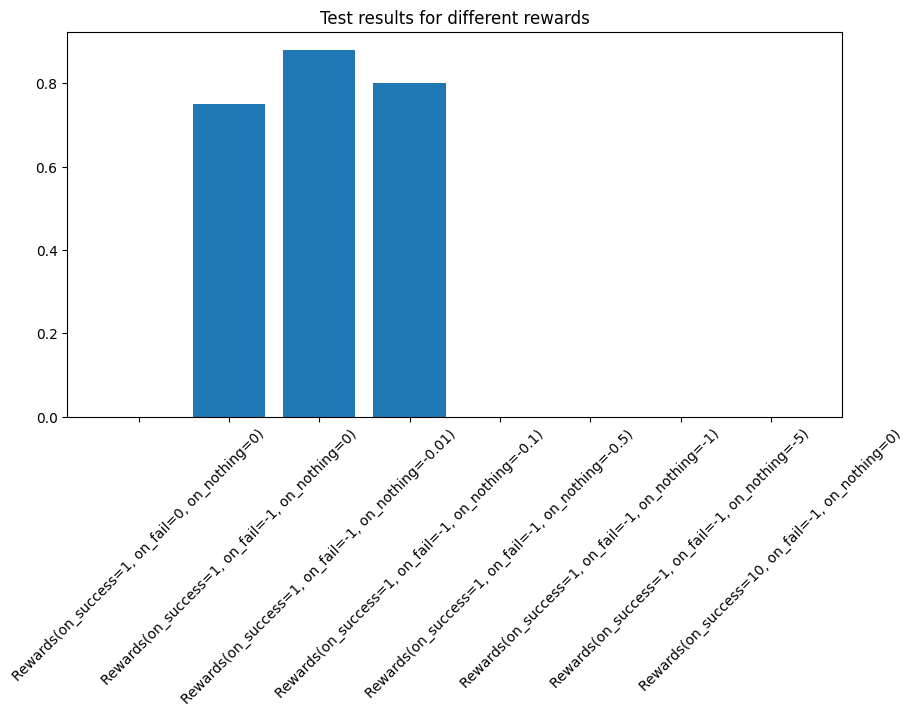

In [4]:
import matplotlib.pyplot as plt

rewards_list = [
    Rewards(on_success=1, on_fail=0, on_nothing=0),
    Rewards(on_success=1, on_fail=-1, on_nothing=0),
    Rewards(on_success=1, on_fail=-1, on_nothing=-0.01),
    Rewards(on_success=1, on_fail=-1, on_nothing=-0.1),
    Rewards(on_success=1, on_fail=-1, on_nothing=-0.5),
    Rewards(on_success=1, on_fail=-1, on_nothing=-1),
    Rewards(on_success=1, on_fail=-1, on_nothing=-5),
    Rewards(on_success=10, on_fail=-1, on_nothing=0),
]

test_results = []
for rewards in rewards_list:
    agent = Agent(
        train_env,
        n_episodes=1000,
        learning_rate=0.1,
        epsilon=1,
        epsilon_decay=0.1,
        discount_factor=0.99,
        rewards=rewards,
    )
    agent.train()
    test_results.append(agent.test(100))
    plt.figure(figsize=(10, 5))

plt.bar(range(len(test_results)), test_results)
plt.xticks(range(len(test_results)), rewards_list, rotation=45)
plt.title("Test results for different rewards")
plt.show()

## Wizualizacja
Wizualizacja dostępna po włączeniu pliku src/visualize.py

## Wnioski

Karanie agenta za wpadnięcie do dziury daje podobne wyniki jak nie karanie. Dodanie małej kary za nieudane ruchy zwiększa wyniki agenta. Dodanie większej kary za nieudane ruchy powoduje, że agent nie jest w stanie nauczyć się poprawnego zachowania. Za wysoka nagroda za sukces również spfawia, że agent się nie uczy.